# Asteroid Hazard prediction using classification models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dataset.csv')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7756\1378625307.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dataset.csv')


In [3]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.shape

(958524, 45)

In [5]:
df['pha'].unique()

array(['N', 'Y', nan], dtype=object)

# Data Preprocessing(EDA)

In [6]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


<AxesSubplot:>

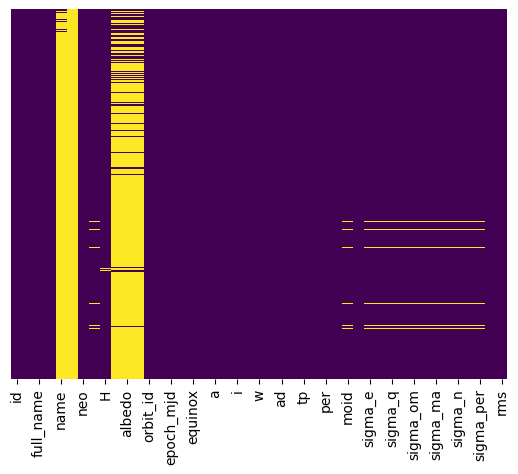

In [7]:
#plotting null values
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.drop(['name','prefix','diameter','albedo','diameter_sigma'],axis=1,inplace=True)

<AxesSubplot:>

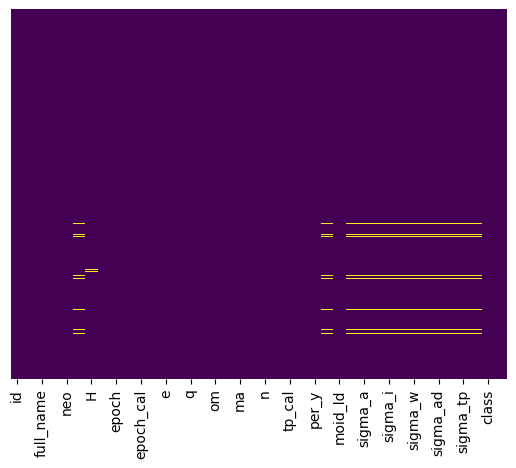

In [9]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [11]:
#encoding object(str) dtype to int dtype
df['id']=le.fit_transform(df['id'])
df['full_name']=le.fit_transform(df['full_name'])
df['neo']=le.fit_transform(df['neo'])
df['pha']=le.fit_transform(df['pha'])
df['orbit_id']=le.fit_transform(df['orbit_id'])
df['equinox']=le.fit_transform(df['equinox'])
df['class']=le.fit_transform(df['class'])

#1st converting into str dtype, then to int dtype
df['pdes']=df['pdes'].astype(str)
df['pdes']=le.fit_transform(df['pdes'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 40 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         958524 non-null  int32  
 1   spkid      958524 non-null  int64  
 2   full_name  958524 non-null  int32  
 3   pdes       958524 non-null  int32  
 4   neo        958524 non-null  int32  
 5   pha        958524 non-null  int32  
 6   H          952261 non-null  float64
 7   orbit_id   958524 non-null  int32  
 8   epoch      958524 non-null  float64
 9   epoch_mjd  958524 non-null  int64  
 10  epoch_cal  958524 non-null  float64
 11  equinox    958524 non-null  int32  
 12  e          958524 non-null  float64
 13  a          958524 non-null  float64
 14  q          958524 non-null  float64
 15  i          958524 non-null  float64
 16  om         958524 non-null  float64
 17  w          958524 non-null  float64
 18  ma         958523 non-null  float64
 19  ad         958520 non-n

In [13]:
#encoding null values of float dtype
df['H']=le.fit_transform(df['H'])
df['epoch']=le.fit_transform(df['epoch'])
df['epoch_cal']=le.fit_transform(df['epoch_cal'])
df['e']=le.fit_transform(df['e'])
df['a']=le.fit_transform(df['a'])
df['q']=le.fit_transform(df['q'])
df['i']=le.fit_transform(df['i'])
df['om']=le.fit_transform(df['om'])
df['w']=le.fit_transform(df['w'])
df['ma']=le.fit_transform(df['ma'])
df['ad']=le.fit_transform(df['ad'])
df['n']=le.fit_transform(df['n'])
df['tp']=le.fit_transform(df['tp'])
df['tp_cal']=le.fit_transform(df['tp_cal'])
df['per']=le.fit_transform(df['per'])
df['per_y']=le.fit_transform(df['per_y'])
df['moid']=le.fit_transform(df['moid'])
df['moid_ld']=le.fit_transform(df['moid_ld'])
df['sigma_e']=le.fit_transform(df['sigma_e'])
df['sigma_a']=le.fit_transform(df['sigma_a'])
df['sigma_q']=le.fit_transform(df['sigma_q'])
df['sigma_i']=le.fit_transform(df['sigma_i'])
df['sigma_om']=le.fit_transform(df['sigma_om'])
df['sigma_w']=le.fit_transform(df['sigma_w'])
df['sigma_ma']=le.fit_transform(df['sigma_ma'])
df['sigma_ad']=le.fit_transform(df['sigma_ad'])
df['sigma_n']=le.fit_transform(df['sigma_n'])
df['sigma_tp']=le.fit_transform(df['sigma_tp'])
df['sigma_per']=le.fit_transform(df['sigma_per'])
df['rms']=le.fit_transform(df['rms'])

In [14]:
df.isnull().sum()

id           0
spkid        0
full_name    0
pdes         0
neo          0
pha          0
H            0
orbit_id     0
epoch        0
epoch_mjd    0
epoch_cal    0
equinox      0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
dtype: int64

In [15]:
#converting float dtype into int dtype
df['H']=df['H'].astype(int)
df['epoch']=df['epoch'].astype(int)
df['epoch_cal']=df['epoch_cal'].astype(int)
df['e']=df['e'].astype(int)
df['a']=df['a'].astype(int)
df['q']=df['q'].astype(int)
df['i']=df['i'].astype(int)
df['om']=df['om'].astype(int)
df['w']=df['w'].astype(int)
df['ma']=df['ma'].astype(int)
df['ad']=df['ad'].astype(int)
df['n']=df['n'].astype(int)
df['tp']=df['tp'].astype(int)
df['tp_cal']=df['tp_cal'].astype(int)
df['per']=df['per'].astype(int)
df['per_y']=df['per_y'].astype(int)
df['moid']=df['moid'].astype(int)
df['moid_ld']=df['moid_ld'].astype(int)
df['sigma_e']=df['sigma_e'].astype(int)
df['sigma_a']=df['sigma_a'].astype(int)
df['sigma_q']=df['sigma_q'].astype(int)
df['sigma_i']=df['sigma_i'].astype(int)
df['sigma_om']=df['sigma_om'].astype(int)
df['sigma_w']=df['sigma_w'].astype(int)
df['sigma_ma']=df['sigma_ma'].astype(int)
df['sigma_ad']=df['sigma_ad'].astype(int)
df['sigma_n']=df['sigma_n'].astype(int)
df['sigma_tp']=df['sigma_tp'].astype(int)
df['sigma_per']=df['sigma_per'].astype(int)
df['rms']=df['rms'].astype(int)

In [16]:
df.head()

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,0,2000001,413389,0,0,0,11,517,4925,58600,...,0,0,0,0,0,0,0,0,8,23126
1,1,2000002,413390,113927,0,0,18,494,5245,59000,...,3517,407,130,6643,909,82,11026,1493,8,15868
2,2,2000003,413391,635604,0,0,32,323,5245,59000,...,1567,9676,2519,4361,746,72,6846,1180,8,13933
3,3,2000004,413392,746715,0,0,8,489,4925,58600,...,5,3,1,29,135,25,47,353,8,19814
4,4,2000005,413393,857830,0,0,189,325,5245,59000,...,223,21979,13685,4887,841,136,6483,1367,8,32016


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
#independent and dependent var
x=df.drop(labels=['pha'],axis=1)
y=df['pha']

In [19]:
#No=0, Yes=1, Nan=2
y.unique()

array([0, 1, 2])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((670966, 39), (287558, 39))

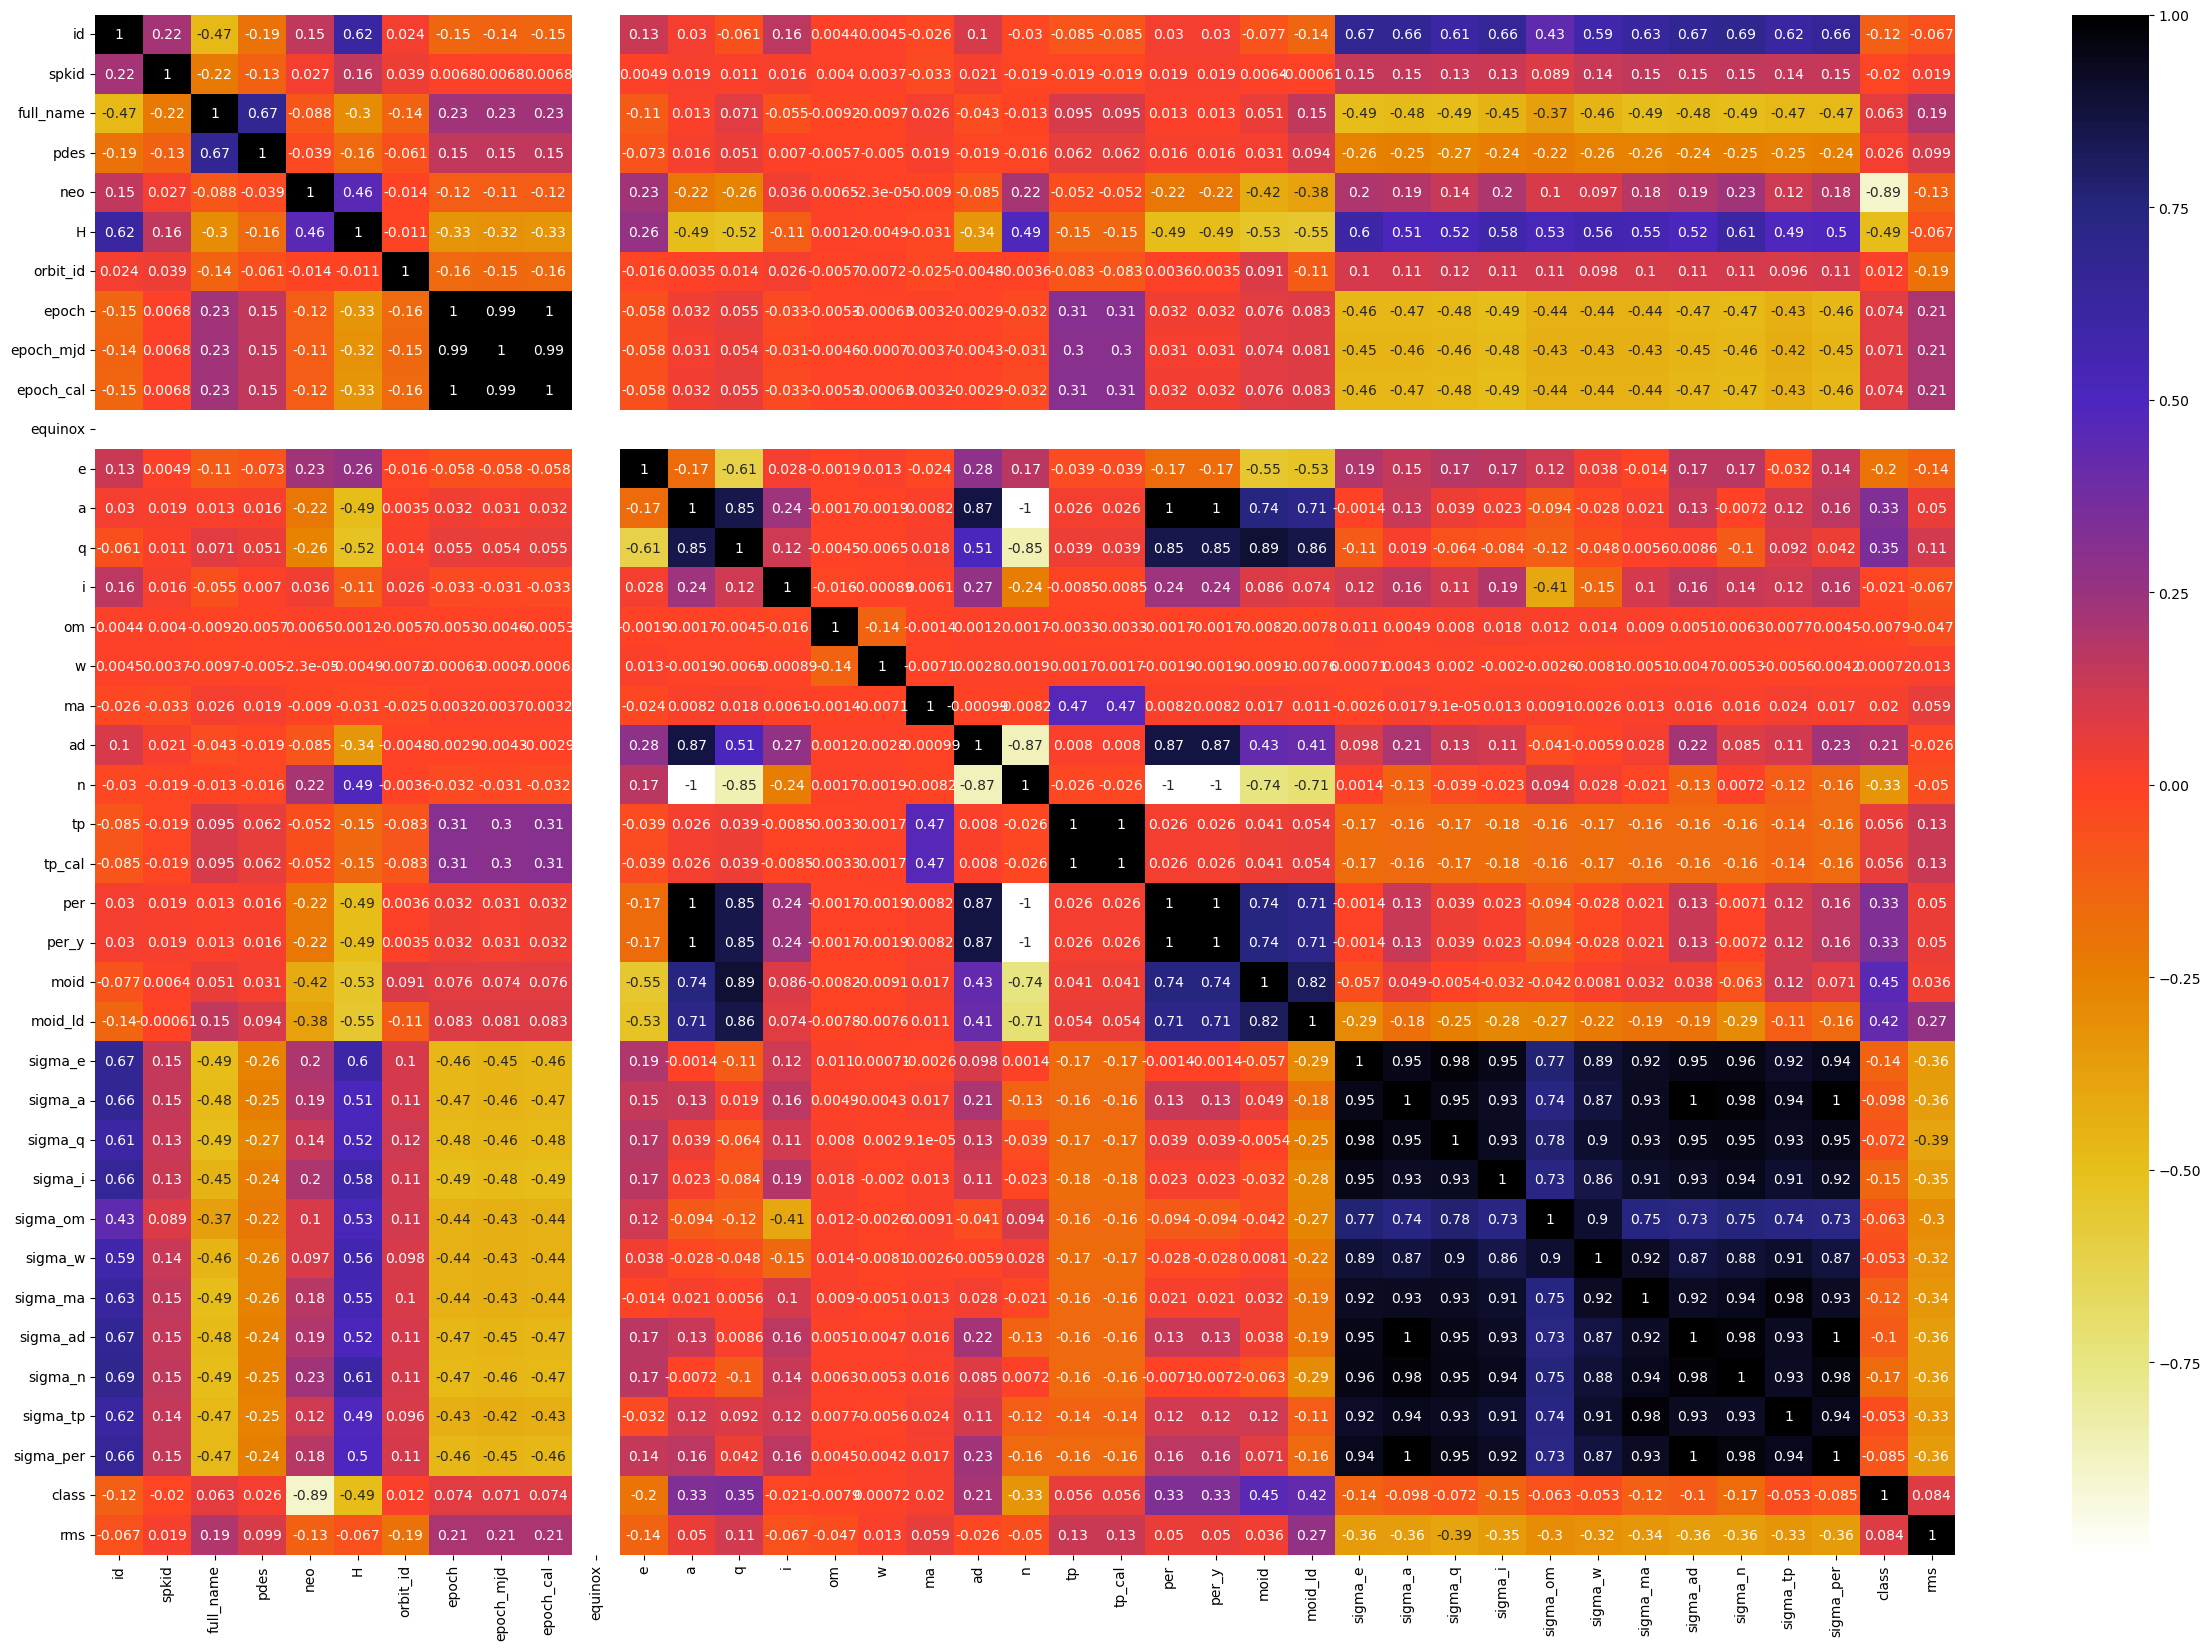

In [21]:
#pearson correlation
plt.figure(figsize=(30,20))
cor= x_train.corr()
sb.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [22]:
def correlation(df, thresold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(1):
            if abs(corr_matrix.iloc[i, j]) > thresold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
#columns with correlation > 0.7
corr_features=correlation(x_train, 0.7)
len(set(corr_features))

1

In [24]:
corr_features

{'id'}

In [25]:
#removing columns with correlation greater than 0.7
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,spkid,full_name,pdes,neo,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
840267,3722235,294432,407212,0,6042,185,5245,59000,5245,0,...,140128,87981,158550,195180,195548,181796,216792,208582,9,24677
493247,2493248,906636,850330,0,2657,445,5245,59000,5245,0,...,33807,33363,89678,103827,53618,29478,136496,73234,8,37559
93180,2093181,506569,950950,0,2287,374,5245,59000,5245,0,...,62038,15158,18576,25895,26012,11340,67660,43643,8,36324
553332,3203861,8703,119928,0,5655,33,5245,59000,5245,0,...,97300,74717,138901,126491,25632,18898,147258,41090,9,46506
113153,2113154,526542,14619,0,2239,401,5245,59000,5245,0,...,14664,108426,100000,32196,28058,10084,72389,47028,8,38328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501547,2501548,914936,859553,0,3755,1,5245,59000,5245,0,...,53072,93450,85195,31840,56506,47564,70783,67924,8,39320
244662,2244663,658051,574120,0,3255,33,5245,59000,5245,0,...,40433,51406,61019,56281,33511,28011,77690,49743,8,38580
779931,3809038,234175,346844,0,4255,0,5245,59000,5245,0,...,68498,94418,86859,60890,78675,76408,81076,86668,8,43093
517855,2517856,931244,877672,0,3555,54,5245,59000,5245,0,...,23677,92921,84919,35067,52895,38683,72681,67177,8,45711


In [26]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Feature selection
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([4.23157382e-02, 7.26500991e-02, 2.76885815e-02, 2.74884438e-02,
       8.77294079e-03, 2.17851932e-02, 1.07965429e-01, 1.86033103e-01,
       1.42068765e-01, 1.85282728e-01, 0.00000000e+00, 6.56521805e-03,
       5.16283497e-03, 9.52389898e-03, 5.19180817e-04, 4.54385172e-05,
       0.00000000e+00, 3.00639235e-04, 2.99461452e-03, 5.17145133e-03,
       3.69822209e-03, 3.72211701e-03, 5.15845444e-03, 5.14232958e-03,
       1.10550657e-01, 1.10373600e-01, 1.01920176e-01, 1.03059307e-01,
       1.02740930e-01, 1.01690091e-01, 1.01901924e-01, 1.02023535e-01,
       1.01968328e-01, 1.02644065e-01, 1.01596484e-01, 1.03285560e-01,
       1.03320965e-01, 1.34096844e-01, 9.95199841e-02])

In [28]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

epoch        0.186033
epoch_cal    0.185283
epoch_mjd    0.142069
class        0.134097
moid         0.110551
moid_ld      0.110374
orbit_id     0.107965
sigma_per    0.103321
sigma_tp     0.103286
sigma_a      0.103059
sigma_q      0.102741
sigma_ad     0.102644
sigma_w      0.102024
sigma_ma     0.101968
sigma_e      0.101920
sigma_om     0.101902
sigma_i      0.101690
sigma_n      0.101596
rms          0.099520
spkid        0.072650
id           0.042316
full_name    0.027689
pdes         0.027488
H            0.021785
q            0.009524
neo          0.008773
e            0.006565
n            0.005171
a            0.005163
per          0.005158
per_y        0.005142
tp_cal       0.003722
tp           0.003698
ad           0.002995
i            0.000519
ma           0.000301
om           0.000045
w            0.000000
equinox      0.000000
dtype: float64

<AxesSubplot:>

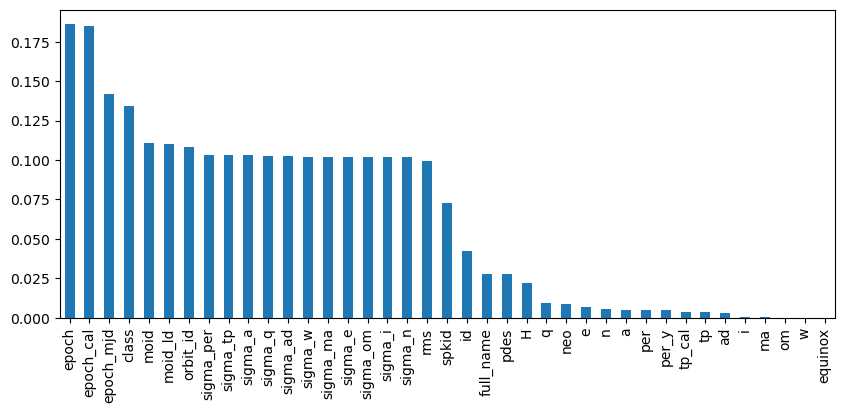

In [29]:
#columns with high mutual_info
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [30]:
#selecting 23 best columns in respect to mutual_info
cols=SelectKBest(mutual_info_classif,k=23)
cols.fit(x_train.fillna(0),y_train)
x_train.columns[cols.get_support()]

Index(['id', 'spkid', 'full_name', 'pdes', 'orbit_id', 'epoch', 'epoch_mjd',
       'epoch_cal', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'class', 'rms'],
      dtype='object')

# Model Training

In [31]:
#DecisionTreeClassifier(acc~99.99)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
x_train_accuracy=model.predict(x_train)
train_accuracy=accuracy_score(x_train_accuracy,y_train)
train_accuracy

1.0

In [33]:
x_test_accuracy=model.predict(x_test)
test_accuracy=accuracy_score(x_test_accuracy,y_test)
test_accuracy

0.9999304488138046

>1, train: 0.998, test: 0.998
>2, train: 0.998, test: 0.998
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000


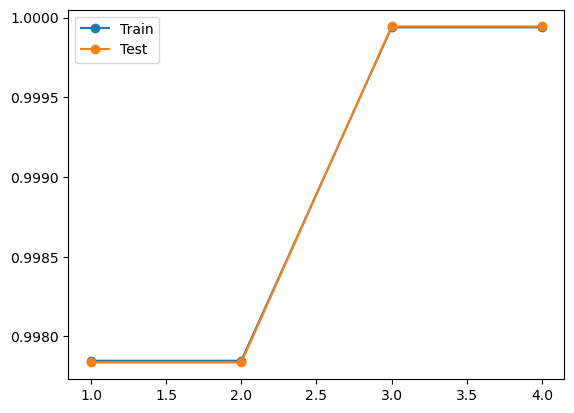

In [34]:
#checking overfit
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]

for i in values:
 model = DecisionTreeClassifier(max_depth=i)
 model.fit(x_train, y_train)
 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [35]:
#SVM(acc~99.85)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import svm

In [36]:
sc = StandardScaler()
sc.fit(x_train)
x_train_svm = sc.transform(x_train)
x_test_svm = sc.transform(x_test)

model= SVC(kernel='linear',random_state=0,C=1.0)
model.fit(x_train_svm,y_train)

SVC(kernel='linear', random_state=0)

In [37]:
pred1 = model.predict(x_train_svm)
pred2 = model.predict(x_test_svm)

In [38]:
train_svm=accuracy_score(y_train,pred1)
test_svm=accuracy_score(y_test,pred2)
print(train_svm)
print(test_svm)

0.9986303329825953
0.9985915884795415


In [39]:
#RandomForestClassifier(acc~99.78)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='gini',random_state=1,max_depth=3)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [40]:
rf_pred=classifier.predict(x_test)
test_ranF=accuracy_score(y_test,rf_pred)
print(test_ranF)

0.9978369581093206


In [41]:
#NaiveBayes(acc~98.12)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [42]:
nb_pred=classifier.predict(x_test)
test_nb=accuracy_score(y_test,nb_pred)
print(test_nb)

0.9812211797272202


In [43]:
#Logistic_Regression(acc~99.76)
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(random_state=0)
regression.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [44]:
log_pred=regression.predict(x_test)
test_log=accuracy_score(y_test,log_pred)
print(test_log)

0.9976943781776199


In [45]:
#XGBoostClassifier(acc~98.12)
import xgboost
from xgboost import XGBClassifier

In [46]:
xg_model=XGBClassifier()
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [47]:
xg_pred=classifier.predict(x_test)
test_xg=accuracy_score(y_test,xg_pred)
print(test_xg)

0.9812211797272202


In [48]:
#KNN(acc~98.12)
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
knn_pred=classifier.predict(x_test)
test_knn=accuracy_score(y_test,knn_pred)
print(test_knn)

0.9812211797272202


# Accuracy in different classification models

In [52]:
print('KNN- ',test_knn)
print('DecisionTreeClassfier- ',test_accuracy)
print('SupportVectorMachine- ',test_svm)
print('RandomForestClassifier- ',test_ranF)
print('NaiveBayes- ',test_nb)
print('LogisticRegression- ',test_log)
print('XGBoost- ',test_xg)

KNN-  0.9812211797272202
DecisionTreeClassfier-  0.9999304488138046
SupportVectorMachine-  0.9985915884795415
RandomForestClassifier-  0.9978369581093206
NaiveBayes-  0.9812211797272202
LogisticRegression-  0.9976943781776199
XGBoost-  0.9812211797272202


# Model Building

In [56]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
train_acc=model.predict(x_train)
train_dt=accuracy_score(train_acc,y_train)
train_dt

1.0

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_acc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    280858
           1       0.98      0.98      0.98       622
           2       1.00      1.00      1.00      6078

    accuracy                           1.00    287558
   macro avg       0.99      0.99      0.99    287558
weighted avg       1.00      1.00      1.00    287558



In [63]:
test_acc=model.predict(x_test)
test_dt=accuracy_score(test_acc,y_test)
print('Accuracy score is ', test_dt)

Accuracy score is  0.9999269712544947
